In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
%load_ext autoreload
%autoreload 2
from implementations import *

In [2]:
from helpers import *

# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)

In [41]:
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
y, X = sample_data(y, products, seed, size_samples=400)
x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

In [4]:
MAX_ITERS = 2
GAMMA = 0.1
y_test = np.array([[0.1],[0.3], [0.5]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
print(least_squares(y_test, tx_test))

(array([[ 0.2187858 ],
       [-0.05383734]]), 0.026941580756013744)


In [5]:
y_test = np.array([[0.],[1.], [1.]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
initial_w = np.array([[0.5], [1. ]])


print(logistic_regression(y_test, tx_test, initial_w, MAX_ITERS, GAMMA))

(array([[0.37856053],
       [0.80113119]]), 1.3483578175129307)


In [6]:
y_test = np.array([[0.],[1.], [1.]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
initial_w = np.array([[0.5], [1. ]])


print(reg_logistic_regression(y_test, tx_test, 1.0, initial_w, MAX_ITERS, GAMMA))

(array([[0.21606187],
       [0.46774656]]), 0.9721649929512527)


In [7]:
y_test = np.array([[0.],[1.], [1.]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
initial_w = np.array([[0.409111], [0.843996]])


print(reg_logistic_regression(y_test, tx_test, 1.0, initial_w, 0, GAMMA))

(array([[0.409111],
       [0.843996]]), 1.4073273893870053)


In [8]:
y_test = np.array([[0.1],[0.3], [0.5]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
initial_w = np.array([[0.5], [1. ]])


print(mean_squared_error_gd(y_test, tx_test, initial_w, MAX_ITERS, GAMMA))

(array([[-0.0505865],
       [ 0.203718 ]]), 0.05153391102516714)


In [9]:
y_test = np.array([[0.1],[0.3], [0.5]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
initial_w = np.array([[0.413044], [0.875757]])


print(mean_squared_error_gd(y_test, tx_test, initial_w, 0, GAMMA))

(array([[0.413044],
       [0.875757]]), 2.9598356612287233)


In [10]:
y_test = np.array([[0.1],[0.3], [0.5]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
print(ridge_regression(y_test, tx_test, 1.0))
#print(ridge_regression(np.array([[0.1],[0.2]]), np.array([[2.3, 3.2], [1., 0.1]]), 1.))
#array([0.03947092, 0.00319628])

(array([[0.0543035 ],
       [0.04271303]]), 0.03174958621423909)


In [11]:
y_test = np.array([[0.1],[0.3], [0.5]])

tx_test = np.array([[2.3, 3.2],[1. , 0.1],[1.4, 2.3]])
initial_w = np.array([[0.5], [1. ]])

print(mean_squared_error_sgd(y_test[:1], tx_test[:1], initial_w, MAX_ITERS, GAMMA))

(array([[0.0630575],
       [0.39208  ]]), 0.8445947735940318)


In [12]:
np.corrcoef(X[:,0],X[:,-1])

array([[1.        , 0.19014552],
       [0.19014552, 1.        ]])

In [11]:
number_features=x.shape[1]
corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x[:,i], x[:,j])[1,0]
        corr_matrix[i][j]=corr
#print(corr_matrix)

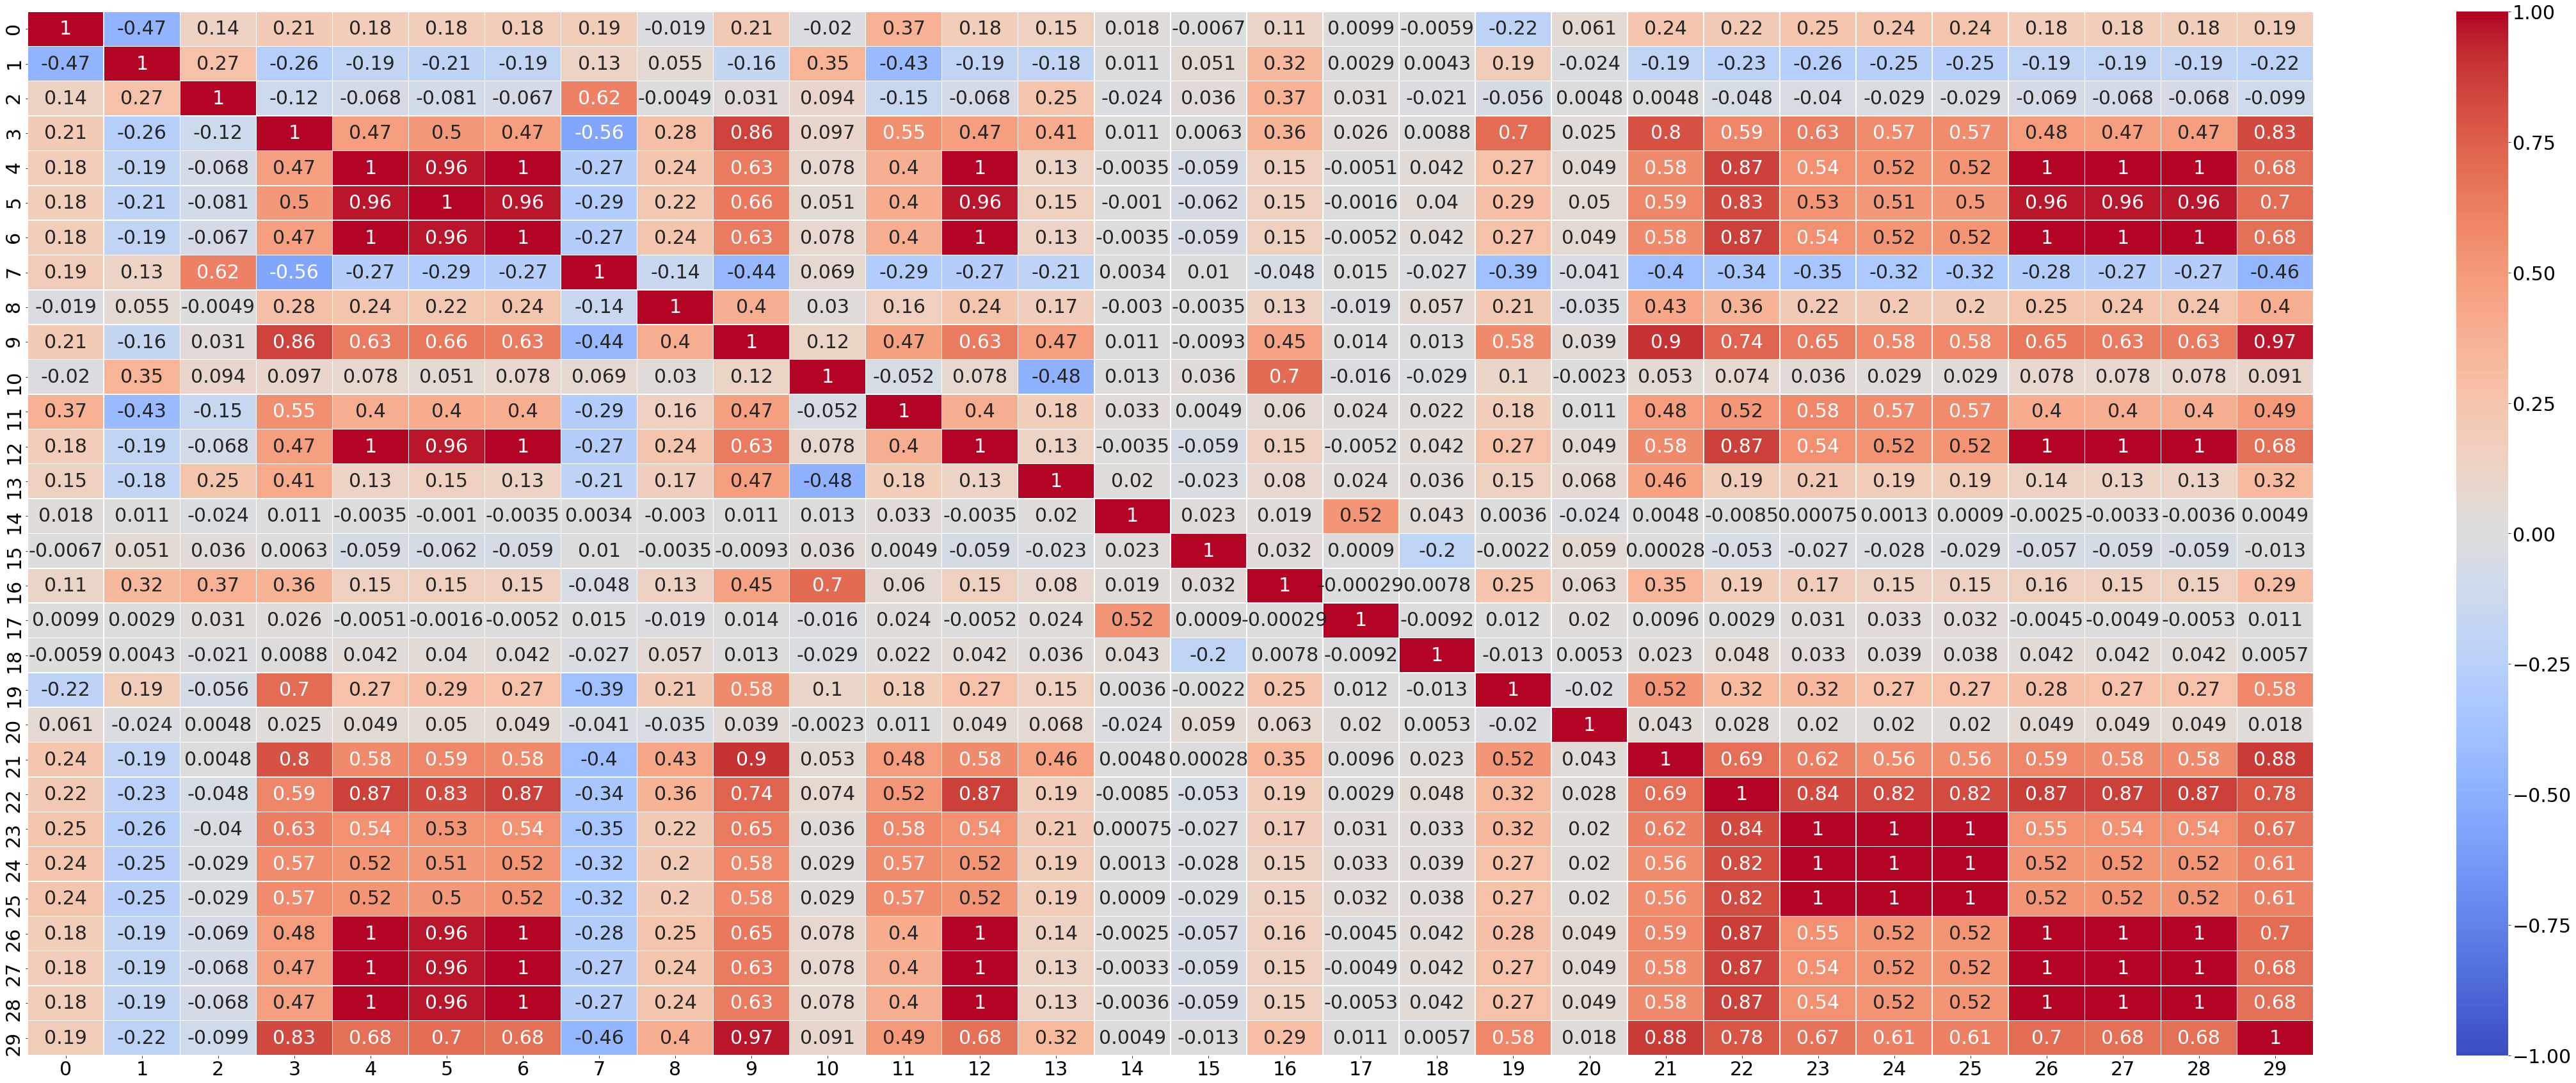

In [13]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

array([ 5.,  6.,  7., 10., 22., 25., 26., 27., 28., 29., 30.])

In [66]:
number_features=X.shape[1]
spearman_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        spear,_ = stats.spearmanr(X[:,i],X[:,j])
        spearman_matrix[i][j]=spear

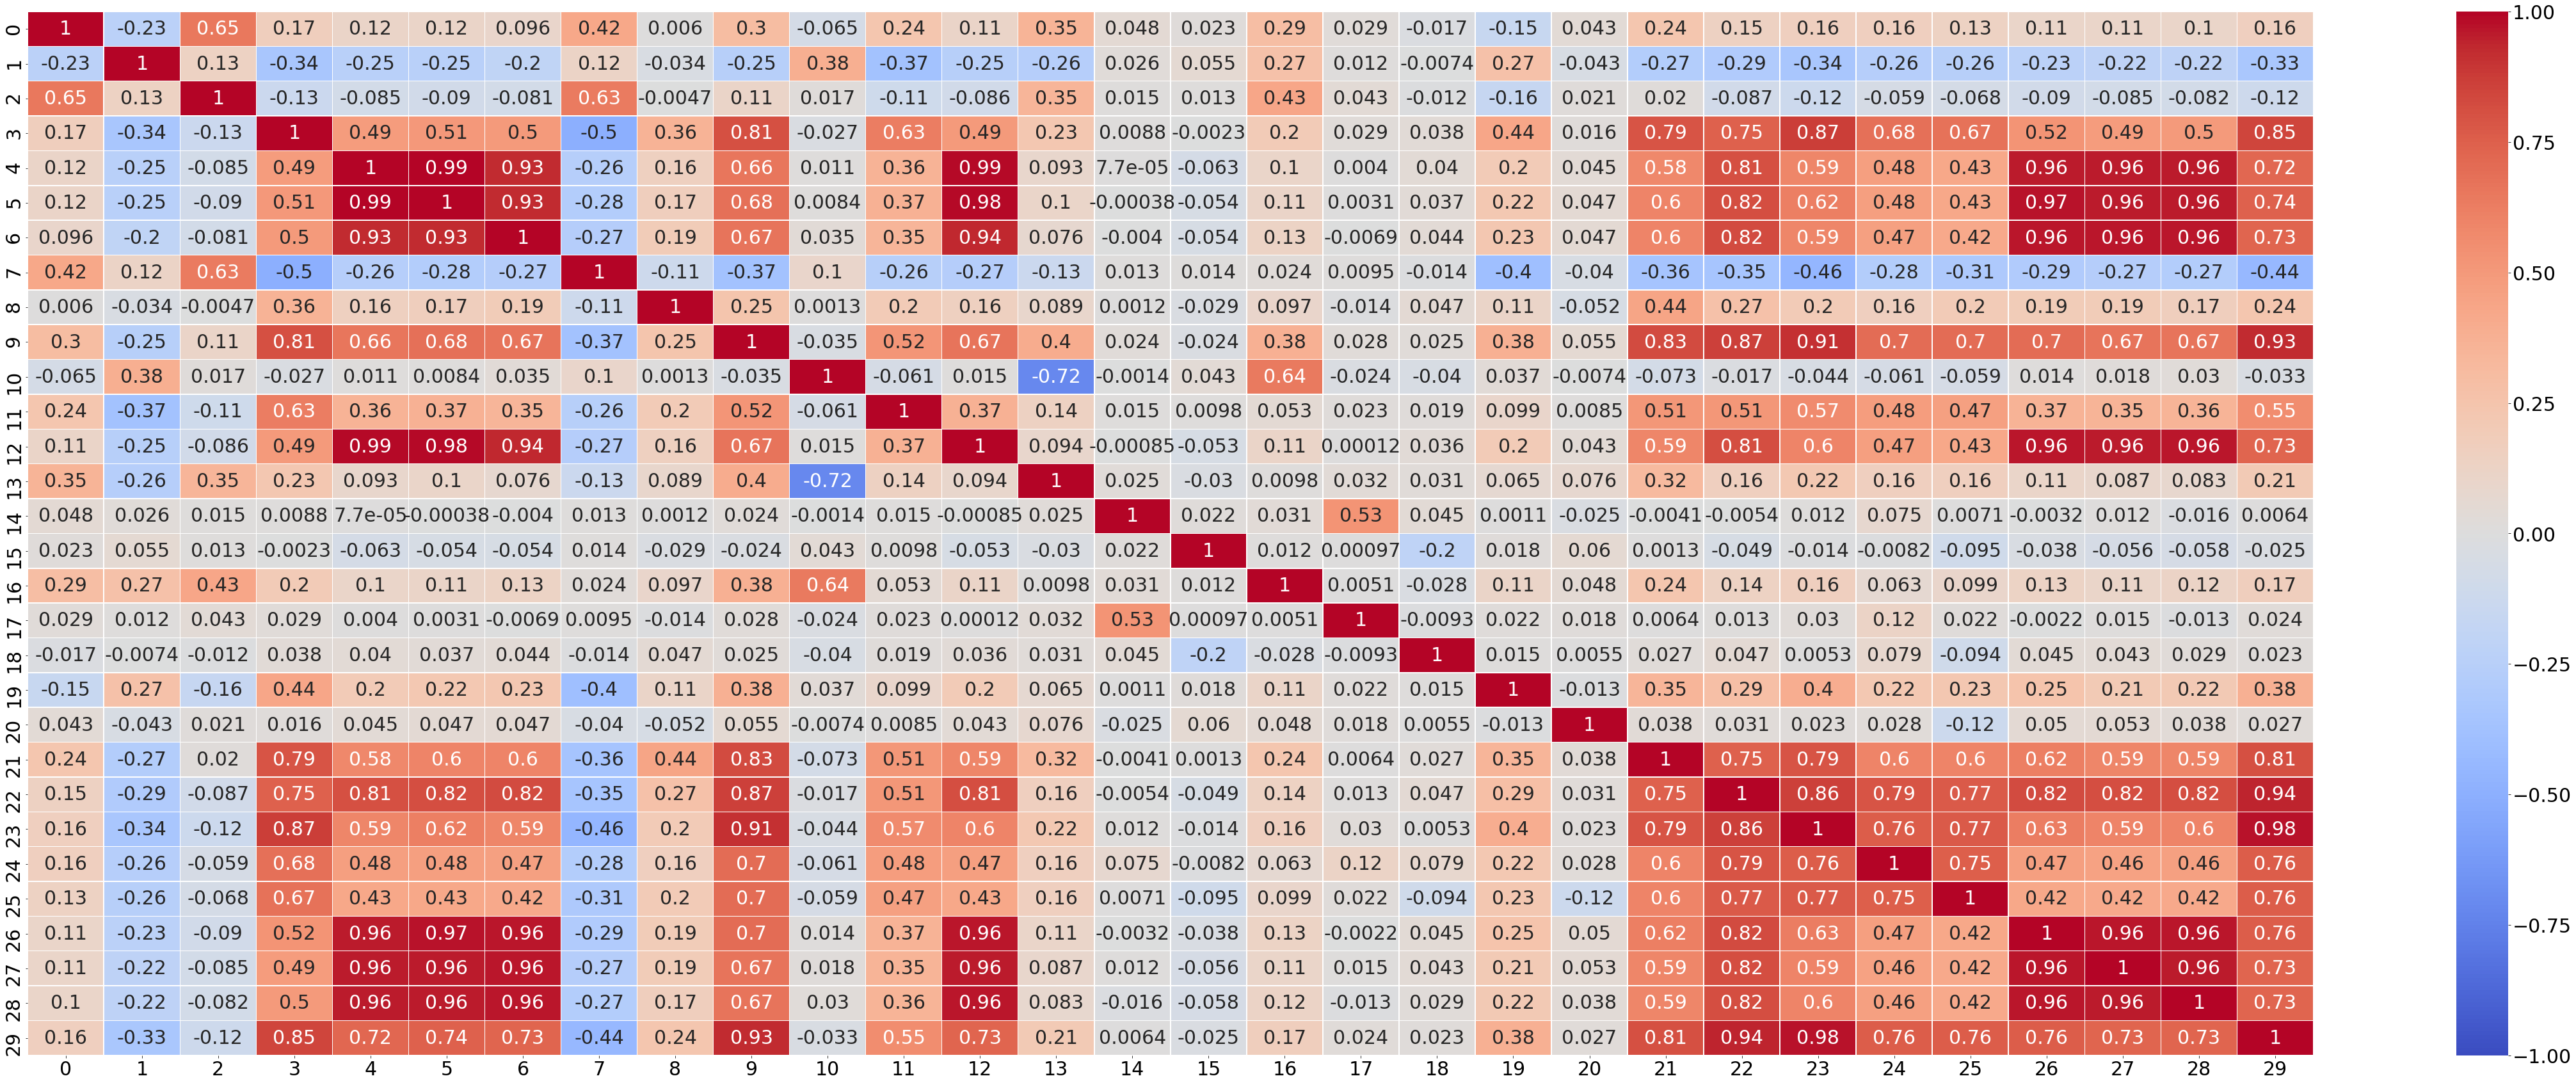

In [67]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(spearman_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

### Create new tx matrix with uncorrelated features 

In [58]:
# Features that appear correlated
# Keep only 1 for each group of correlated features
#26,28,27,12 --> 12
#23,24,25 --> 23
#4,5,6,12 --> 12
#29,9,3,21 --> 3
# create new matrix tx for training

axis = 1 #rows (0), columns (1)
obj = [4,5,6,9,21,24,25,26,27,28,29]
x_reduced = np.delete(x,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]
#more drastic
#21 to 29



In [59]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

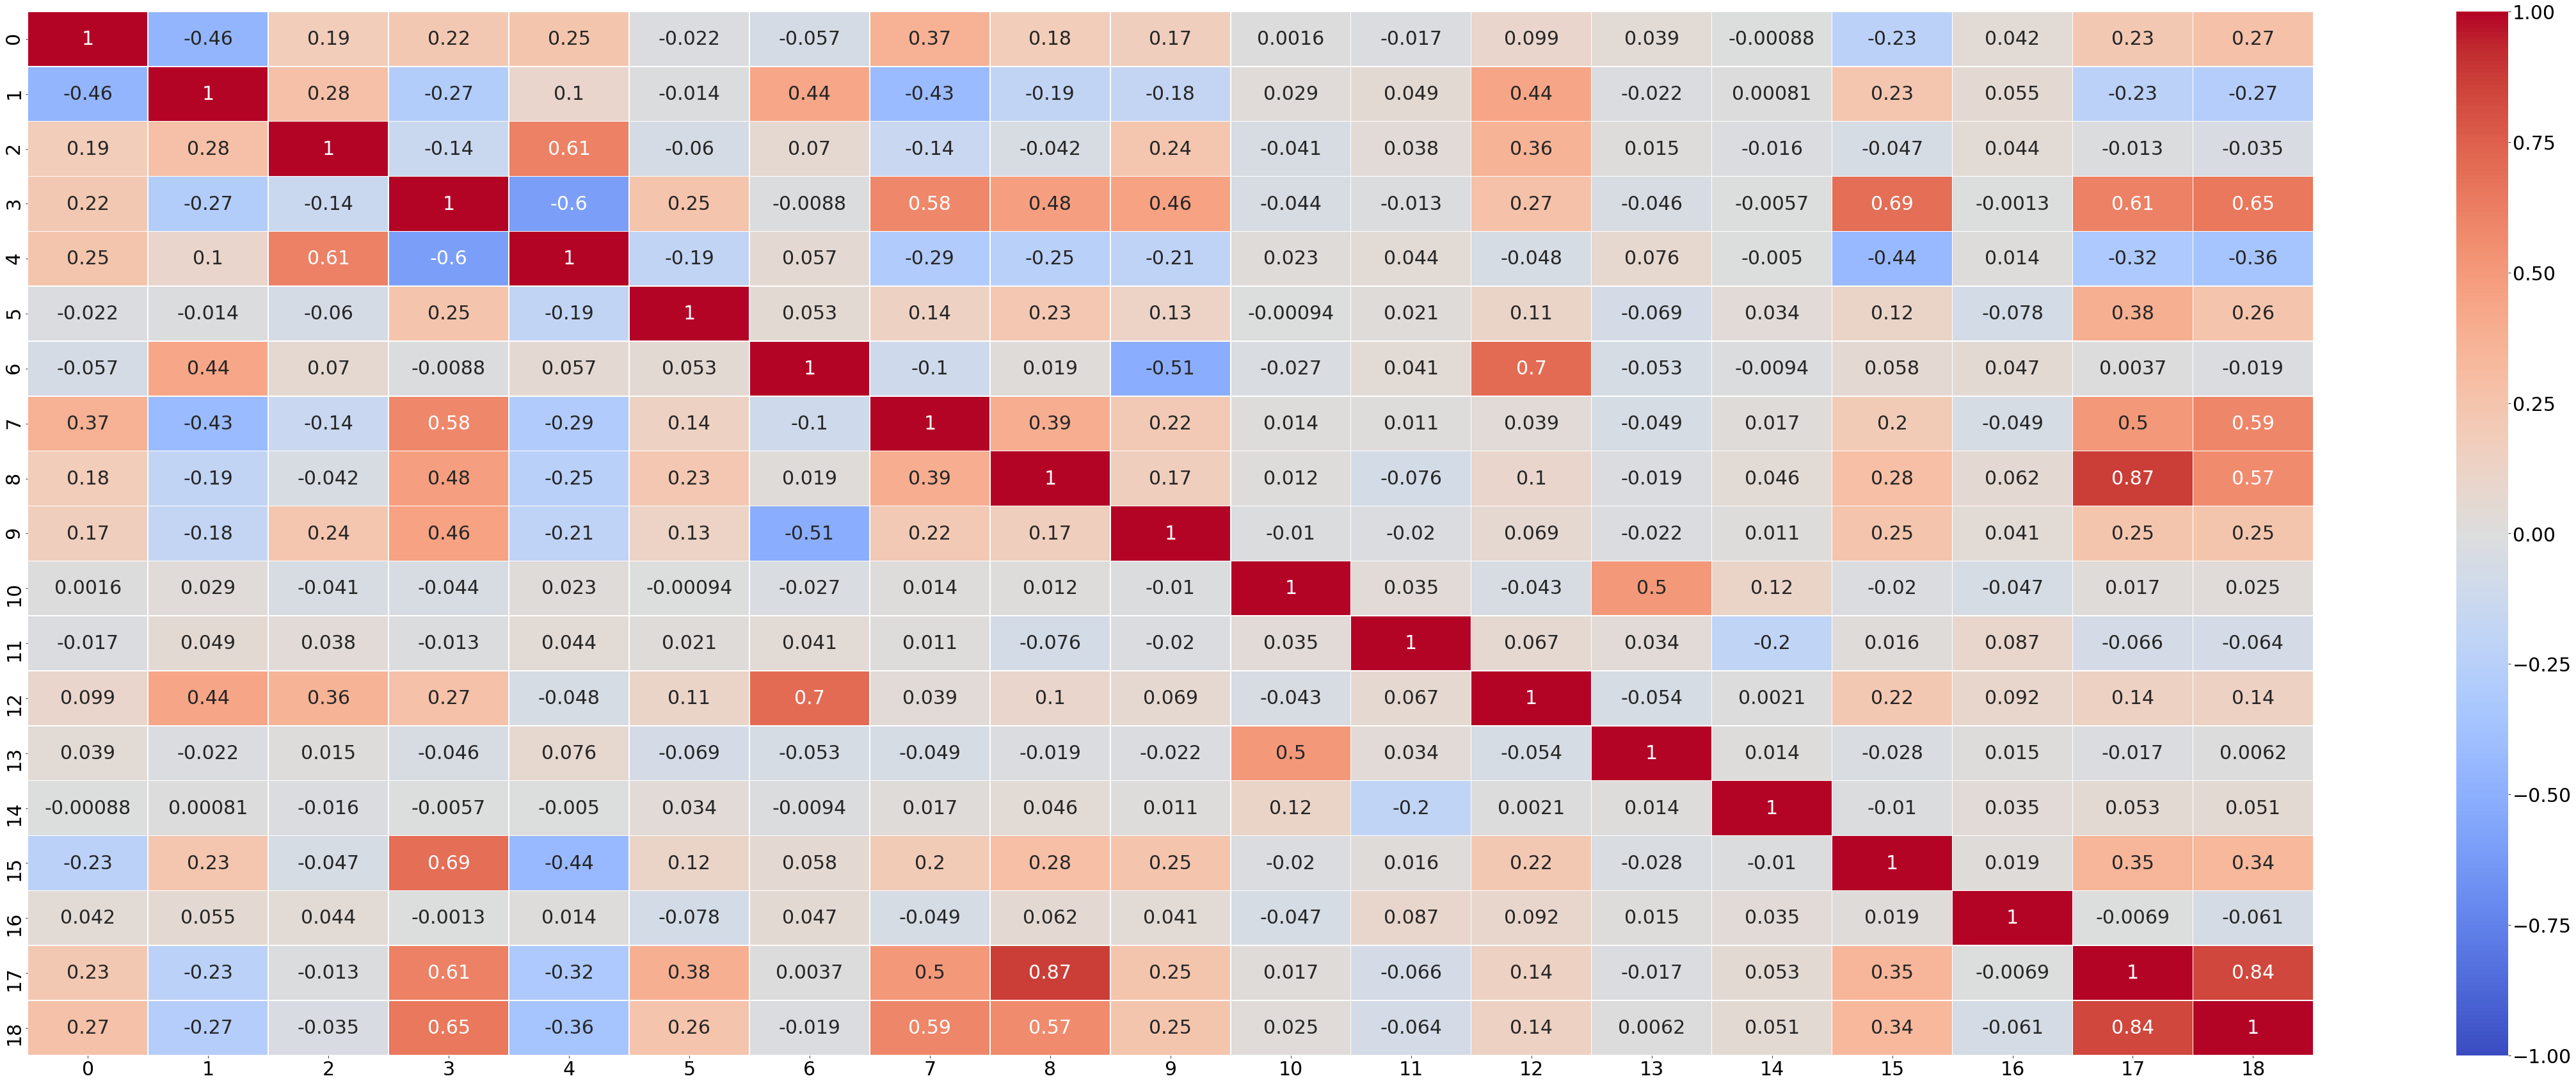

In [60]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [45]:
# 17,18,8 --> 8

axis = 1 #rows (0), columns (1)
obj = [17,18]
x_reduced = np.delete(x_reduced,obj,axis)
tx_reduced = np.c_[np.ones((y.shape[0], 1)), x_reduced]

In [46]:
number_features=x_reduced.shape[1]
reduced_corr_matrix = np.zeros((number_features,number_features))

for i in range(number_features):
    for j in range(number_features):
        corr = np.corrcoef(x_reduced[:,i], x_reduced[:,j])[1,0]
        reduced_corr_matrix[i][j]=corr

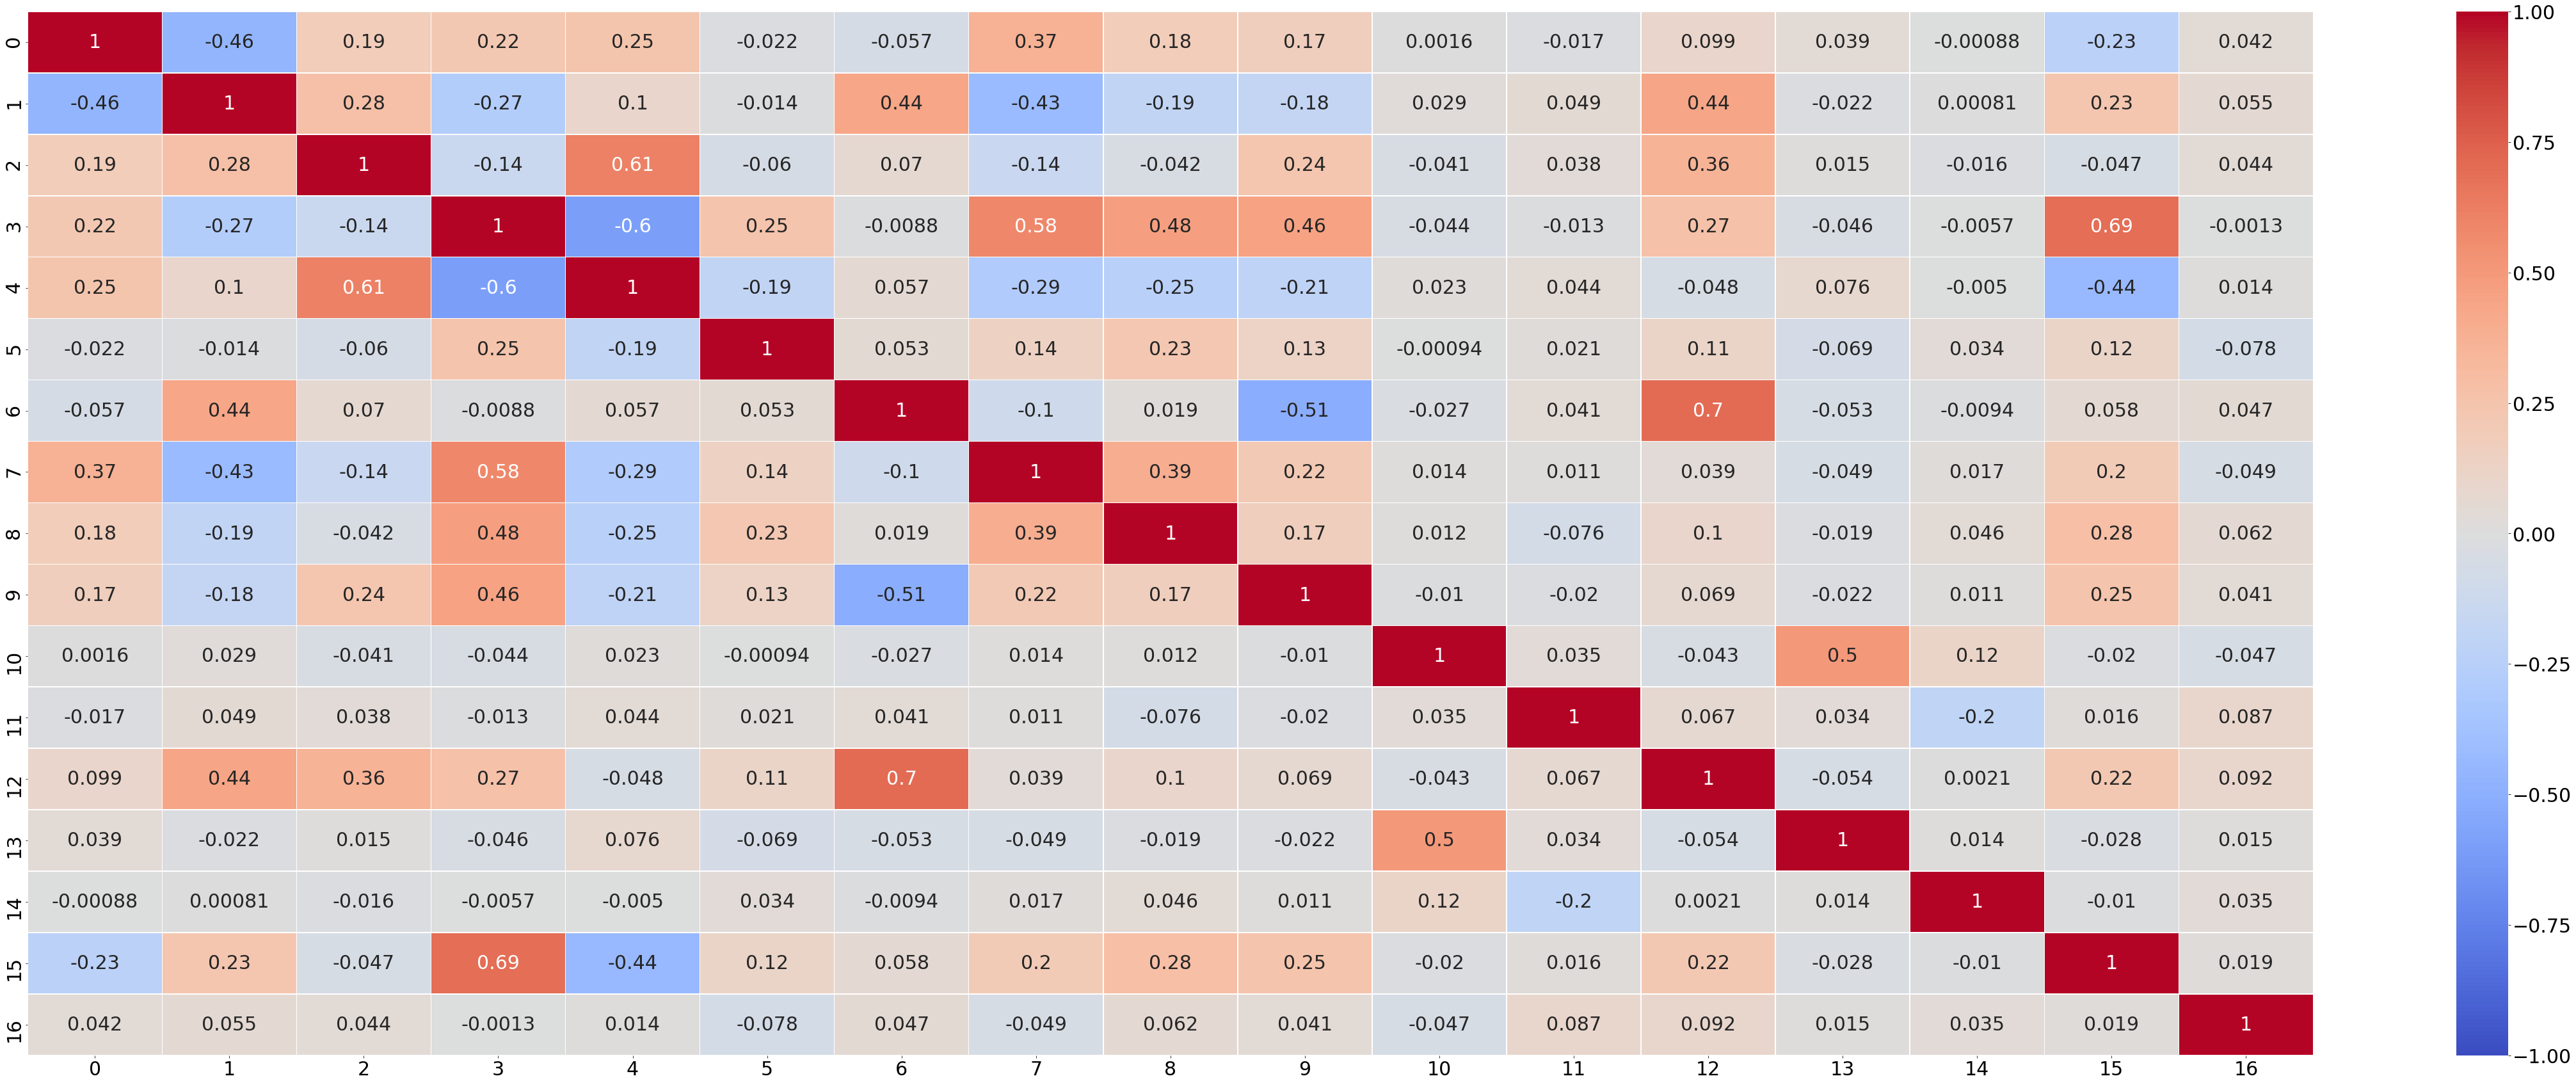

In [47]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(reduced_corr_matrix,vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

In [39]:
# it seems that there are no uncorrelated features anymore
# try tests to see if loss worsens

### Gradient Descent

In [4]:
print(y.shape, x.shape)
np.seterr(divide = 'ignore') 
initial_w = np.zeros((tx.shape[1], 1))

(1000, 1) (1000, 30)


We need to find a balance between the number of iteration and gamma (the step size), the shorter the number of iterations we do, the faster it runs but we stay far away from an optimum loss

In [5]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.9887157191548617 --- 0.009551763534545898 seconds ---


If we increment too much the number of iterations then the code becomes really slow

In [6]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 1000000, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.8127890774559601 --- 51.643584966659546 seconds ---


As we can see our loss has reduced significantly, however it took too long to compute

In [7]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10000, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.816464947351656 --- 0.5407059192657471 seconds ---


Here we can see a good balance, the loss has barely increased and the computing time is much lower.
The logic is similar respect to gamma, the shorter the step size is, the more iterations we would need to get to the optimal loss

In [8]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10000, 0.0000001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.9986612313087818 --- 0.5388510227203369 seconds ---


And the larger the gamma, we might miss the optimal loss and diverge

### Stochastic Gradient Descent

In [9]:
print(y.shape, x.shape)

np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

start_time = time.time()

w_sgd, loss_sgd = mean_squared_error_sgd(y, tx, initial_w, 1, 100000, 0.001)
print("loss:", np.sqrt(2*loss_sgd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

(1000, 1) (1000, 30)
loss: 0.8221575216337149 --- 11.478657960891724 seconds ---


### EDA

import pandas as pd
X_panda = pd.DataFrame(X)

plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(data = X_panda.corr().round(2),vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

along the diagonal 1 --> my correlation between the same feature
4,5,6,12 --> seem to be correlated (correlation score between 0.95 and 1)
from 21 to 29 --> more or less correlated
from 3 to 12 and from 21 to 29 seem to be correlated

### LEAST SQUARES WITH NORMAL EQUATIONS

In [10]:
print(y.shape, x.shape)

w_ls , loss_ls = least_squares(y,tx)
print(np.sqrt(2*loss_ls[0][0]))

#print(w_ls)

(1000, 1) (1000, 30)
0.8093956252718545


### Logistic Regression

In [51]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

iter_num = 1000
gamma = 0.00001
w_lr, loss_lr = logistic_regression(y,tx, initial_w, iter_num, gamma)
print("loss with all the features", np.sqrt(2*loss_lr))

#print(w_ls, "\n", w_lr)
initial_w = np.zeros((tx_reduced.shape[1], 1))

w_lr, loss_lr = logistic_regression(y,tx_reduced, initial_w, iter_num, gamma)
print("loss with reduced feature matrix", np.sqrt(2*loss_lr))
#the loss becomes negative if we choose to big of a gamma and number of iterations
#it seems that at some point we go past the global minimum and start diverging 
#having a very small gamma solves this problem
#the minimal value I could find is 0.8540791315850801 (with rmse 100 samples)


# with 400 samples --> when gamma = 0.0001
# it diverges because when iterations increases the loss increases
# with gamma = 0.00007 or lower --> it does not diverge (RMSE 0.88633 with 10000 iter, same for 100000)
#after 10000 iter the loss reduces very slowly --> we are close to the optimum and the remaining 90000 iter are
# just fine refinements (we are moving around the optimum)
# as gamma increases --> computational time decreases but only under a certain threshold


loss with all the features 1.1580110264650267
loss with reduced feature matrix 1.1664555152407088


In [30]:
print(np.linalg.norm(w_lr))

# as the number of iterations increases the norm increases

0.18047572392310723


### Linear Cross-validation (half-half)

In [53]:
from cross_validation import *

In [55]:




k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_linear_gd(y, x,  k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)

#there s some overfit with linear regression

train loss :  [[0.91347686]] test loss :  [[0.91278756]]


### cross_validation of logistic regression 

In [61]:
loss_train, loss_test = cross_validation_logistic_regression(y, x,  k_indices, 1)
print("train loss all features: ", loss_train, "test loss all features: ", loss_test)

# model is generalizable (test loss is lower than train loss)
# logistic regression is more appropriate to this dataset as y is binary
# there might be a bit of underfit 

train loss all features:  [[0.89409192]] test loss all features:  [[0.88369431]]


In [62]:
loss_train, loss_test = cross_validation_logistic_regression(y, x_reduced,  k_indices, 1)
print("train loss reduced features: ", loss_train, "test loss reduced features: ", loss_test)

train loss reduced features:  [[0.90976796]] test loss reduced features:  [[0.91648511]]


### Find best lambda for ridge regression

 the choice of lambda which leads to the best test rmse is 0.07880 with a test rmse of 0.843


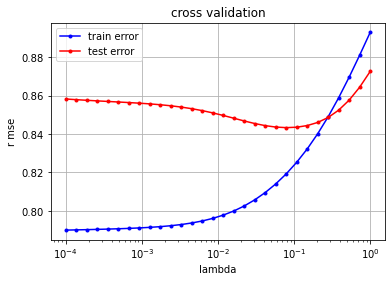

In [8]:
best_lambda, best_rmse = find_best_lambda_ridge_regression(x, y, 7, np.logspace(-4, 0, 30))

### Penalized logistic regression

In [40]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))

lambda_ = 1

w_lr, loss_lr = reg_logistic_regression(y,tx, lambda_, initial_w, 100000, 0.00001)
print("loss", np.sqrt(2*loss_lr[0][0]))
#print(w_ls, "\n", w_lr)

# if gamma bigger than 0.00001 --> diverge
# if lambda = 0 --> no regularization (loss 0.88632)
# if lambda increases --> loss increases (0.8898)--> l2 norm of final weights vector decreases
# we avoid overfitting because we penalize large weights with the L2 norm
# if we set lambda to zero --> we go back to normal logistic regression
# 

loss 0.9302020251662649


In [41]:
np.linalg.norm(w_lr)

0.1297329413911314

### Cross-validation of penalized logistic regression

In [48]:
from cross_validation import *
k=1
lambda_=0.000001
loss_train, loss_test = cross_validation_reg_logistic_regression(y, x, k_indices, k,lambda_)
print("train loss : ", loss_train, "test loss : ", loss_test)

# we see that the loss both with logistic regression and reg logistic regression is similar
# no need to regularize because the data are not lineraly separable 
# (if they were --> we would never find a vector with logistic regression as it would go to infinity)
# test loss is better with log than reg log


train loss :  [[0.90813373]] test loss :  [[0.8869914]]


### Find best lambda for regularized logistic regression

 the choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of 0.916


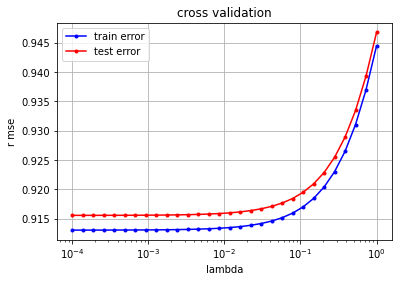

In [16]:
best_lambda, best_rmse = find_best_lambda_reg_logistic_regression(x, y, 7, np.logspace(-4, 0, 30))

# we see that when regularizing --> we just increase rmse both for train and test 
# do not understand why reversed

### Find best gamma 

In [8]:
def cross_validation_reg_logistic_regression_gamma(y, x, k_indices, k, lambda_, iterations, gamma):
    """return the loss of ridge regression for a fold corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """
    train_tx, train_y, test_tx, test_y = separate_data(x, y, k_indices, k)

    w, loss_tr = reg_logistic_regression(
        train_y, train_tx, lambda_, np.zeros((train_tx.shape[1], 1)), iterations, gamma
    )

    # rr_test = ridge_regression(test_y, poly_test, lambda_)

    loss_te = compute_loss_mse(test_y, test_tx, w) + lambda_ * np.dot(w.T, w)

    loss_tr = np.sqrt(2 * loss_tr) + lambda_ * np.dot(w.T, w)

    loss_te = np.sqrt(2 * loss_te) + lambda_ * np.dot(w.T, w)

    return loss_tr, loss_te

In [11]:
def find_best_gamma_reg_logistic_regression_gamma(x, y, k_fold, gammas):
    """cross validation over regularisation parameter lambda.

    Args:
        k_fold: integer, the number of folds
        lambdas: shape = (p, ) where p is the number of values of lambda to test
    Returns:
        best_lambda : scalar, value of the best lambda
        best_rmse : scalar, the associated root mean squared error for the best lambda
    """
    l=0.1
    iterations = 10000
    seed = 12
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # set the best rmse to a maximal value as a start
    best_rmse = 101
    best_lambda = 0
    for g in gammas:
        rmse_tr_temp = 0.0
        rmse_te_temp = 0.0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation_reg_logistic_regression_gamma(
                y, x, k_indices, k, l,iterations,g 
            )

            rmse_tr_temp += loss_tr
            rmse_te_temp += loss_te
        # do the average
        rmse_tr_temp = rmse_tr_temp / k_fold
        rmse_te_temp = rmse_te_temp / k_fold

        if rmse_te_temp < best_rmse:
            best_rmse = rmse_te_temp
            best_gamma = g
        rmse_tr.append(rmse_tr_temp[0])
        rmse_te.append(rmse_te_temp[0])

    cross_validation_visualization(gammas, rmse_tr, rmse_te)
    print(
        " the choice of gamma which leads to the best test rmse is %.5f with a test rmse of %.3f"
        % (best_gamma, best_rmse)
    )
    return best_lambda, best_rmse

 the choice of gamma which leads to the best test rmse is 0.00001 with a test rmse of 0.919


(0, array([[0.91895267]]))

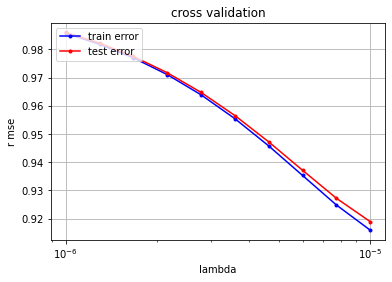

In [15]:
find_best_gamma_reg_logistic_regression_gamma(x, y, 3, np.logspace(-6, -5, 10))

### Features range boxplot

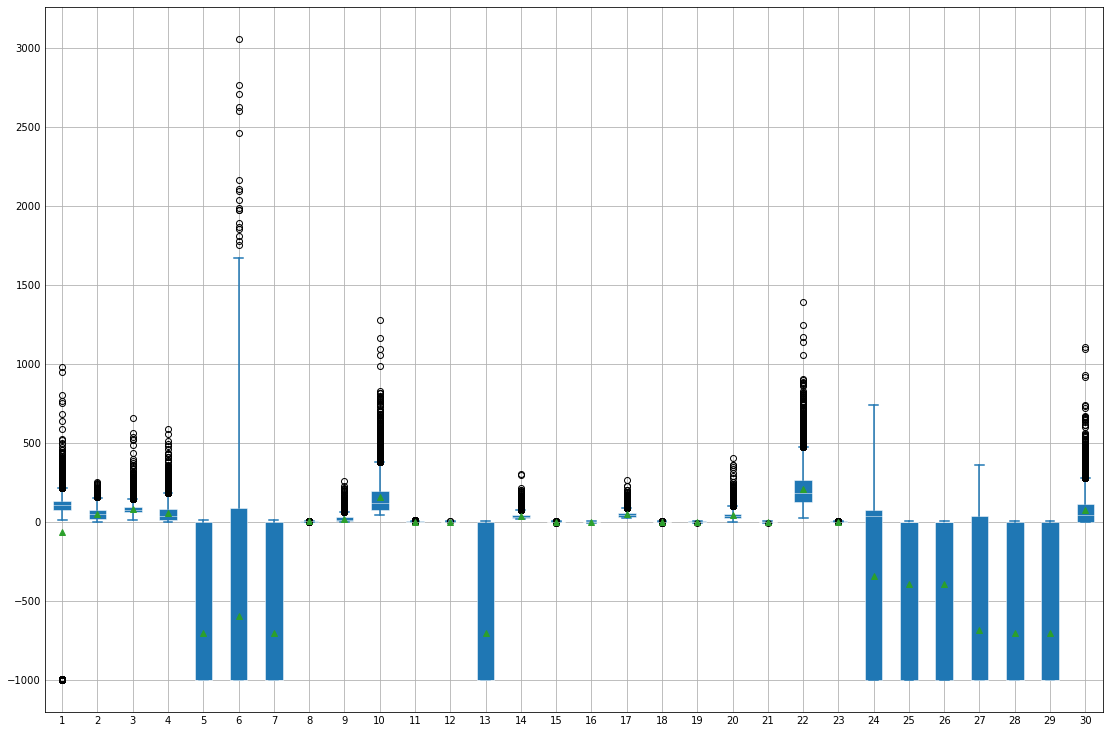

In [3]:
products_tuple = tuple(map(tuple, products))
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal(products_tuple)

r = list(range(500))

# plot
fig, ax = plt.subplots()


fig.set_size_inches(15, 10)



VP = ax.boxplot(D, patch_artist=True,
                showmeans=True, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

plt.show()

### Histograms per feature

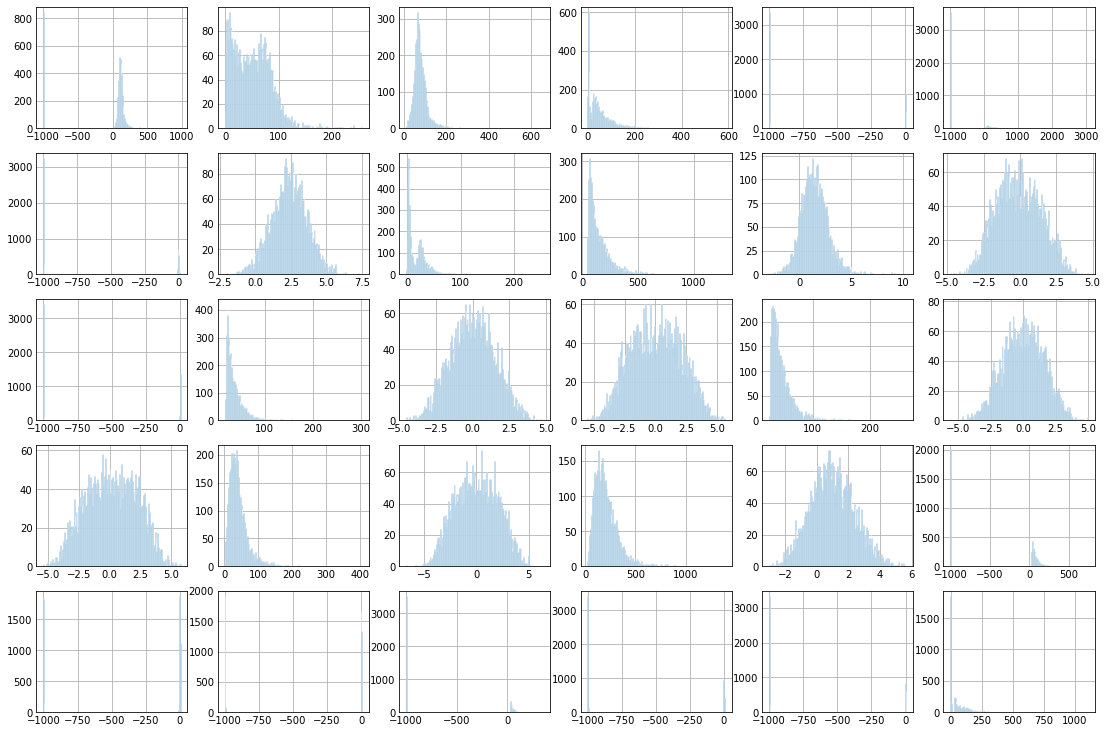

In [5]:
plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)

# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)

i=0
j=0
for feature in products.T:
    x = np.random.normal(feature)
    ax[i,j].hist(x, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1



plt.show()